
# Otsu Method 

In this method we detect the edge's of the image 

In [7]:
from __future__ import absolute_import 
from __future__ import division
from __future__ import print_function

In [8]:
import cv2
import pylab as plt
import numpy as np

In [9]:
def varienceCalculate(average, histgram):
    vrience = 0
    for i in range(len(histgram)):
        varience += (histgram[i] - average) ** 2
    varience /= len(histgram)
    return variance

In [10]:
import numpy as np
a = np.random.rand(12,2)
a

array([[0.18378816, 0.62365457],
       [0.64427061, 0.28249479],
       [0.17764938, 0.38345186],
       [0.25953883, 0.26070406],
       [0.85285631, 0.17428108],
       [0.13030021, 0.07559117],
       [0.06567812, 0.11171922],
       [0.41438987, 0.87980025],
       [0.91101346, 0.54932327],
       [0.67313316, 0.15695836],
       [0.49003985, 0.32311303],
       [0.16716553, 0.665577  ]])

In [11]:
a/=len(a)
a

array([[0.01531568, 0.05197121],
       [0.05368922, 0.02354123],
       [0.01480411, 0.03195432],
       [0.02162824, 0.02172534],
       [0.07107136, 0.01452342],
       [0.01085835, 0.00629926],
       [0.00547318, 0.00930994],
       [0.03453249, 0.07331669],
       [0.07591779, 0.04577694],
       [0.05609443, 0.01307986],
       [0.04083665, 0.02692609],
       [0.01393046, 0.05546475]])

In [12]:
a = 12
a/= a
a

1.0

In [13]:
def averageAndpixelSumCalculate(histgram):
    average = pixelSum = 0
    for i in range(len(histgram)):
        pixelSum += histgram[i]
        brightnessValue = histgram[i] * i
    average = brightnessValue / len(histgram)
    return pixelSum, average

In [14]:
def within_betweenCV(pixelSum1, average1, variance1, pixelSum2, average2, variance2):
    betweenClassVariance = (pixelSum1 * pixelSum2 * ((average1 - average2)**2)/((pixelSum1 + pixelSum2)**2))
    withinClassVariance = (pixelSum1 * varience1 + pixelSum2 * varience2) /(pixelSum1 + pixelSum2)
    return betweenClassVariance, withClassVariance

In [15]:
def calculateAll(blacList, whiteList):
    b_size, b_average = averageAndpixelSumCalculate(blackList)
    w_size, w_average = averageAndpixelSumCalculate(whiteList)
    
    b_variance = varianceCalculate(b_average, blacklist)
    w_variance = varianceCalculate(w_average, whiteList)
    
    betweenCV, withinCV = within_beweenCV(b_size, b_average, b_variance, w_size, w_variance)
    
    totalVariance = betweenCV + withinCV
    seperationMetrics = betweenCV / (totalVariance - betweenCV)
    return separationMetrics

In [16]:
def main():
    image_path = "D:/AI_for_health/chest_X_rays/images_001/images/00000013_036.png"
    image = cv2.imread(image_path,0)
    histgram = cv2.calHist([image], [0], None, [256], [0,256])
    size = 256
    listSM = [0 for i in range(size)]
    for i in range(size):
        if i != 0 and i != size-1:
            blackList = histgram[0:i]
            whiteList = histgram[i:size]
            listSM[i] = calculateAll(blackList, whiteList)
        elif i == 0 or  i == size-1:
            listSM[i] = 0
    maxValue = 0
    for i in range(size):
        if listSM[i] > maxValue:
            maxValue = listSM[i]
            maxValueIndex = i
        print("Treshold", maxValueIndex, "Desu")
        
        output_otsu = np.zeros((len(image), len(image[0])))
        for i in range(len(image)):
            for j in range(len(image[0])):
                if image[i][j] > maxValueIndex:
                    output_otsu[i][j] = 225
                else:
                    output_otsu[i][j] = 0
                    
    average_histgram = int(len(histgram)/2)
    output_average = image.copy()
    output_average[output_average >= average_histgram] = 255
    output_average[output_average < average_histgram] = 0
    # Adaptive gaussian Threshold
    aGH = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 89, 7)
    
    cv2.imwrite("gray.jpj", image)
    cv2.imwrite("average.jpg", output_average)
    cv2.imwrite("otsu.jpg", output_otsu)
    cv2.imwrite("Adaptiv_Gaussian_Thresholding.jpg", aGH)
    
    cv2.imshow("input", image)
    cv2.imshow("average", output_average)
    cv2.imshow("otsu", output_otsu)
    cv2.imshow("adaptive gaussian", aGH)
    
    plt.plot(histgram)                                      
    plt.axvline(x=maxValueIndex, color='red', label='otsu') 
    plt.axvline(x=average_histgram, color='green', label='average')
    plt.legend(loc='upper right')                           
    plt.title("histgram of brightness")                     
    plt.xlabel("brightness")                                
    plt.ylabel("frequency")                                 
    plt.xlim([0, 256])                                      
    plt.show()
    
    if __name__ == '__main__':
        main()

In [20]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import cv2
import pylab as plt
import numpy as np

def varianceCalculate(average, histgram):
    #分散を返す
    variance = 0
    for i in range(len(histgram)):
        variance += (histgram[i] - average) ** 2

    variance /= len(histgram)

    return variance

def averageAndpixelSumCalculate(histgram):
    #平均と画素数の合計を返す
    average = pixelSum = 0
    for i in range(len(histgram)):
        pixelSum += histgram[i]             #ピクセル総数
        brightnessValue = histgram[i] * i   #輝度値の合計

    average = brightnessValue / len(histgram)

    return pixelSum, average

def within_betweenCV(pixelSum1, average1, variance1, pixelSum2, average2, variance2):
    #クラス間分散&クラス内分散を返す

    betweenClassVariance = (pixelSum1 * pixelSum2 * ((average1 - average2) ** 2) ) / ((pixelSum1 + pixelSum2) ** 2)#クラス間分散

    withinClassVariance = (pixelSum1 * variance1 + pixelSum2 * variance2) / (pixelSum1 + pixelSum2)#クラス内分散

    return betweenClassVariance, withinClassVariance

def calculateAll(blackList, whiteList):
    #計算に関する関数を実行
    b_size, b_average = averageAndpixelSumCalculate(blackList)
    w_size, w_average = averageAndpixelSumCalculate(whiteList)

    b_variance = varianceCalculate(b_average, blackList)
    w_variance = varianceCalculate(w_average, whiteList)

    betweenCV, withinCV = within_betweenCV(b_size, b_average, b_variance, w_size, w_average, w_variance)#クラス間分散&クラス内分散

    totalVariance = betweenCV + withinCV#全分散
    separationMetrics = betweenCV / (totalVariance - betweenCV)#クラス間分散とクラス内分散の比：分散度を計算

    return separationMetrics


閾値は 207 です


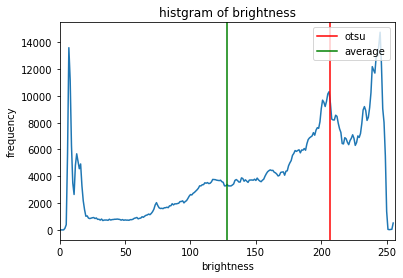

In [21]:
def main():
    #ファイル読み込み_グレイスケールで読み込み
    image_path = "D:/AI_for_health/chest_X_rays/images_001/images/00000001_002.png"                               #読み込む画像の名前
    image = cv2.imread(image_path, 0)                       #画像を読み込んでnumpy型のリストに格納

    #ヒストグラムの作成
    histgram = cv2.calcHist([image], [0], None, [256], [0, 256])

    #分離度を求める
    size = 256
    listSM = [0 for i in range(size)]                       #分離度のリスト listSM=np.zeros(size)
    for i in range(size):
        if i != 0 and i != size-1:
            blackList = histgram[0: i]                      #輝度の小さい方のリスト_blackList
            whiteList = histgram[i: size]                   #輝度の大きい方のリスト_whiteList
            listSM[i] = calculateAll(blackList, whiteList)  #分散度
        elif i == 0 or i == size-1:
            listSM[i] = 0                                   #２つのリストに分けられないときは例外処理

    #最大の分離度から閾値を求める
    maxValue = 0                                            #最大の分離度
    for i in range(size):
        #print("輝度値:", i, "分離度=", listSM[i])            #debug
        if listSM[i] > maxValue:
            maxValue = listSM[i]
            maxValueIndex = i                               #最大の分散度のインデックスを保存
    print("閾値は", maxValueIndex, "です")

    #求めた閾値を基に画像の２値化を行う
    output_otsu = np.zeros((len(image), len(image[0])))    #大津メソッドの出力に使う配列
    for i in range(len(image)):
        for j in range(len(image[0])):
            if image[i][j] > maxValueIndex:
                output_otsu[i][j] = 255                     #閾値より大きいときは255
            else:
                output_otsu[i][j] = 0                       #閾値よりも小さいときは０


    #ヒストグラムの輝度値の真ん中の値を閾値として２値化した画像の作成
    average_histgram = int(len(histgram) / 2)               #ヒストグラムの長さの半分をint型で取得
    output_average = image.copy()                           #単純な２値化による出力に使う配列
    output_average[output_average >= average_histgram] = 255                  #numpyで短く書ける_大きい要素はすべて255
    output_average[output_average < average_histgram] = 0                     #numpyで短く書ける_任意の値より小さい要素はすべてo


    #Adaptive Gaussian Thresholodingを用いた２値化(オプションで追加)
    #引数(２値化するリスト、条件を満たす要素に割り当てる値、閾値決定方法、変換手法、近傍どれくらい見るか、加重平均から引く値)
    aGH = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 89, 7)


    #画像の保存
    cv2.imwrite("gray.jpg", image)                          #グレイスケール
    cv2.imwrite("average.jpg", output_average)              #静的な閾値使用
    cv2.imwrite("otsu.jpg", output_otsu)                    #大津メソッド
    cv2.imwrite("Adaptive_Gaussian_Thresholoding.jpg", aGH) #OpenCVの動的な閾値使用

    #画像の表示
    cv2.imshow("input", image)                              #グレイスケール
    cv2.imshow("average", output_average)                   #静的な閾値使用
    cv2.imshow("otsu", output_otsu)                         #大津メソッド
    cv2.imshow("adaptive gaussian", aGH)                    #OpenCVの動的な閾値使用

    #ヒストグラムの出力
    plt.plot(histgram)                                      #ヒストグラムの表示
    plt.axvline(x=maxValueIndex, color='red', label='otsu') #大津メソッドの閾値表示
    plt.axvline(x=average_histgram, color='green', label='average')#静的な閾値表示
    plt.legend(loc='upper right')                           #ラベルを表示
    plt.title("histgram of brightness")                     #タイトル
    plt.xlabel("brightness")                                #横軸ラベル
    plt.ylabel("frequency")                                 #縦軸ラベル
    plt.xlim([0, 256])                                      #x軸の範囲設定
    plt.show()

if __name__ == '__main__':
    main()

# RSNA

In [1]:
!pip3 install -q pydicom
!pip3 install -q tqdm
!pip3 install -q imgaug

In [2]:
import os
import sys
import random
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import pydicom
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd
import glob

In [3]:
!pip3 install -q kaggle

In [4]:
os.environ['KAGGLE_USERNAME']=""
os.environ["KAGGL_KEY"]=""

In [5]:
ROOT_DIR = os.path.abspath('C:/Users/vigne/AI_for_health_care/ml-lessons/lesson3-data')
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')

if not os.path.exists(ROOT_DIR):
    os.makedirs(ROOT_DIR)
os.chdir(ROOT_DIR)

In [6]:
!kaggle competitions downloads -c rsna-pneumonia-detection-challenge

usage: kaggle competitions [-h]
                           {list,files,download,submit,submissions,leaderboard}
                           ...
kaggle competitions: error: argument command: invalid choice: 'downloads' (choose from 'list', 'files', 'download', 'submit', 'submissions', 'leaderboard')


In [7]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge

rsna-pneumonia-detection-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip -q -o stage_1_test_images.zip -d stage_1_test_images
!unzip -q -o stahe_1_train_images.zip -d stage_1_train_images
!unzip -q -o stage_1_rain

'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
!git clone https://github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [10]:
os.chdir("Mask_RCNN")
!pip install -q -r requirements.txt

In [11]:
!python setup.py -q install

zip_safe flag not set; analyzing archive contents...


In [12]:
# Import MASK CNN
sys.path.append(os.path.join(ROOT_DIR, 'Mask_RCNN'))
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [13]:
train_dicom_dir = os.path.join(ROOT_DIR, 'stage_1_train_images')
test_dicom_dir = os.path.join(ROOT_DIR, 'stage_1_test_images')

Some setup function and classes for Mask-RCNN
dicom_fps is a list of the dicom image path and filenames
image_annotions is a directory of the annotations keyed by the filenames
parsing the dataset returns a list of the image filenames and the annotations dictonary

In [14]:
def get_dicom_fps(dicom_dir):
    dicom_fps = glob.glob(dicom_dir+'/'+'*.dcm')
    return list(set(dicom_fps))
def parse_dataset(dicom_dir, anns):
    image_fps = get_dicom_fps(dicom_dir)
    image_annotations = {fp: [] for  fp in image_fps}
    for index, row in anns.iterrows():
        fp = os.path.join(dicom_dir, row['patientId']+'.dcm')
        image_annotations[fp].append(row)
    return image_fps, image_annotations

In [15]:
# Following parameters have been selected to reduce running time 
# These are not optimal

class DetectorConfig(Config):
    """Configure for training pneumonia detection on the RSNA pneumonia dataset.
    Overrides values in the base Config class"""
    
    # Give the configuration a recognizable name
    NAME = 'pneumonia'
    
    # Train on 1 GPU and 8 images per GPU, We can put multiple images on each
    # GPU because the images are small. Batch size is 8 (GPUs * images/GPU)
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8
    
    BACKBONE = 'resnet50'
    
    NUM_CLASSES = 2 # background + 1 pneumonia classes
    
    # Use small images for faster training. Set the limits of the small side
    # the large side, and the determines te image shape
    IMAGE_MIN_DIM = 64
    IMAGE_MAX_DIM = 64
    
    RPN_ANCHOR_SCALES = (32,64)
    
    TRAIN_ROIS_PER_IMAGE = 16
    
    MAX_GT_INSTANCES = 3
    
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.9
    DETECTION_NMS_THRESHOLD = 0.1
    
    RPN_TRAIN_ANCHORS_PER_IMAGE = 16
    STEPS_PER_EPOCH = 100
    TOP_DOWN_PYRAMID_SIZE =32
    STEPS_PER_EPOC = 100
    
config = DetectorConfig()
config.display()   


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        3
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.1
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  64
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  64
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [64 64  3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     

In [16]:
class DetectorDataset(utils.Dataset):
    """Dataset class for training pneumonia detection on the RSNA pneumonia"""
    def __init__(self, image_fps, image_annotations, orig_height, orig_width):
        super().__init__(self)
        
        # Add classes
        self.add_class('pneumonia', 1, 'Lung Opacity')
        
        # add images
        for i, fp in enumerate(image_fps):
            annotations = image_annotations[fp]
            self.add_image('pneumonia', image_id=i, path=fp,
                          annotations=annotations, orig_height=orig_height, orig_width=orig_width)
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']
    
    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        ds = pydicom.read_file(fp)
        image = ds.pixel_array
        # If greyscale, Convert to RGB for consistency
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,)*3,-1)
        return image
    
    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['anotations']
        count = len(annotations)
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'],1), dtype=np.unit8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.unit8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
                if a['Target'] == 1:
                    x = int(a['x'])
                    
                    
    

In [17]:
s = np.random.rand(32,10)
s

array([[9.20009542e-01, 7.10824727e-01, 5.17471406e-01, 9.90347988e-01,
        3.85911152e-01, 3.43936474e-01, 8.26812862e-01, 9.60888795e-01,
        1.46891793e-01, 2.51999618e-01],
       [3.78298456e-01, 1.83739335e-01, 5.05649110e-02, 1.71793005e-02,
        7.72559285e-01, 9.44366725e-01, 8.15449543e-01, 4.52879562e-01,
        4.45126272e-01, 3.44193170e-02],
       [5.68147265e-01, 9.40975776e-01, 5.82285557e-01, 4.45595053e-01,
        2.35006463e-01, 9.76256951e-01, 2.97477251e-01, 6.16602661e-01,
        9.91197971e-01, 4.84545224e-02],
       [3.62158115e-01, 6.09186024e-01, 3.20099865e-01, 1.75509254e-01,
        5.79635700e-01, 8.99465275e-01, 6.14394956e-01, 8.88317227e-01,
        6.43236438e-01, 3.50259552e-01],
       [2.22349372e-01, 1.98347431e-01, 8.53737546e-03, 2.29137163e-01,
        3.66647526e-01, 8.25061395e-01, 5.43039395e-01, 3.64526724e-01,
        8.57846468e-01, 1.70036428e-01],
       [5.66603839e-01, 1.12783881e-01, 5.02473918e-01, 7.18228849e-02,
   

In [18]:
sp = {fp: [] for fp in range(10)}
sp

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [19]:
xs = list(set(sp))
xs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
pr = np.stack((s,)* 3, -1)
pr

array([[[9.20009542e-01, 9.20009542e-01, 9.20009542e-01],
        [7.10824727e-01, 7.10824727e-01, 7.10824727e-01],
        [5.17471406e-01, 5.17471406e-01, 5.17471406e-01],
        [9.90347988e-01, 9.90347988e-01, 9.90347988e-01],
        [3.85911152e-01, 3.85911152e-01, 3.85911152e-01],
        [3.43936474e-01, 3.43936474e-01, 3.43936474e-01],
        [8.26812862e-01, 8.26812862e-01, 8.26812862e-01],
        [9.60888795e-01, 9.60888795e-01, 9.60888795e-01],
        [1.46891793e-01, 1.46891793e-01, 1.46891793e-01],
        [2.51999618e-01, 2.51999618e-01, 2.51999618e-01]],

       [[3.78298456e-01, 3.78298456e-01, 3.78298456e-01],
        [1.83739335e-01, 1.83739335e-01, 1.83739335e-01],
        [5.05649110e-02, 5.05649110e-02, 5.05649110e-02],
        [1.71793005e-02, 1.71793005e-02, 1.71793005e-02],
        [7.72559285e-01, 7.72559285e-01, 7.72559285e-01],
        [9.44366725e-01, 9.44366725e-01, 9.44366725e-01],
        [8.15449543e-01, 8.15449543e-01, 8.15449543e-01],
        [4.5

In [22]:
prs = np.random.rand(3,1)
prs

array([[0.01321659],
       [0.0192    ],
       [0.06402056]])

In [24]:
spb = np.stack((prs,)*3, -1)
spb

array([[[0.01321659, 0.01321659, 0.01321659]],

       [[0.0192    , 0.0192    , 0.0192    ]],

       [[0.06402056, 0.06402056, 0.06402056]]])